#  Object classification for self-driving cars

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
bs = 10

In [5]:
path = '/home/riya/datasets/road_object_classification/train'


In [6]:
!ls $path

animal	green_signal  no_entry_board  red_signal	 stop_sign_board
car	models	      pedestrian      school_sign_board  yellow_signal


In [7]:
os.path.join(path,'animal')

'/home/riya/datasets/road_object_classification/train/animal'

In [8]:
fnames=get_image_files(os.path.join(path,'animal'))
fnames[:5]

[PosixPath('/home/riya/datasets/road_object_classification/train/animal/tmg-article_tall;jpeg_quality=20.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/1000-road-toll-01.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/Dead-Bear-on-I-70-near-Eagle-credit-Shane-Macomber-Vail-Daily.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/nature-3067976_960_720.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/index.jpeg')]

In [9]:
data = ImageDataBunch.from_folder('/home/riya/datasets/road_object_classification/train', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(),bs=bs,size=224,num_workers=2).normalize(imagenet_stats)


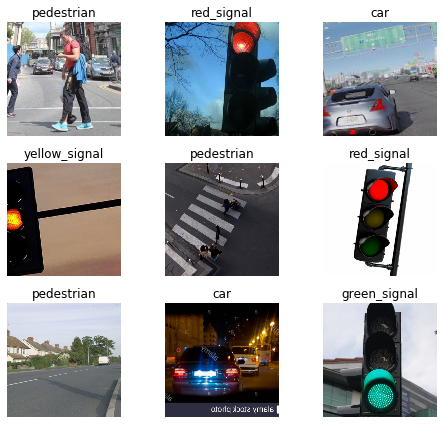

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
print(data.classes)
len(data.classes),data.c

['animal', 'car', 'green_signal', 'no_entry_board', 'pedestrian', 'red_signal', 'school_sign_board', 'stop_sign_board', 'yellow_signal']


(9, 9)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


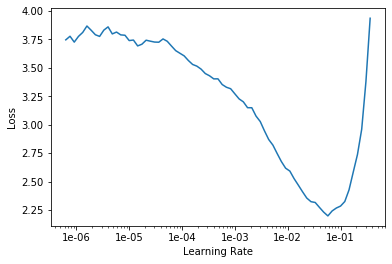

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.939075,1.362430,0.571429,00:33
1,1.894208,0.886477,0.257143,00:33
2,1.305182,1.158511,0.371429,00:32
3,1.003701,1.061419,0.342857,00:34
4,0.789527,0.974695,0.371429,00:33
5,0.638271,0.936837,0.342857,00:32


In [17]:
learn.save('stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

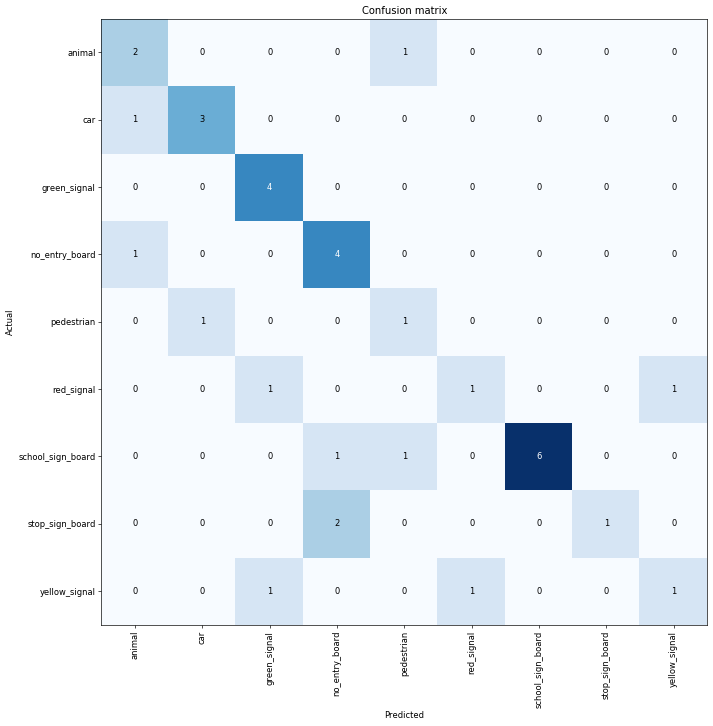

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

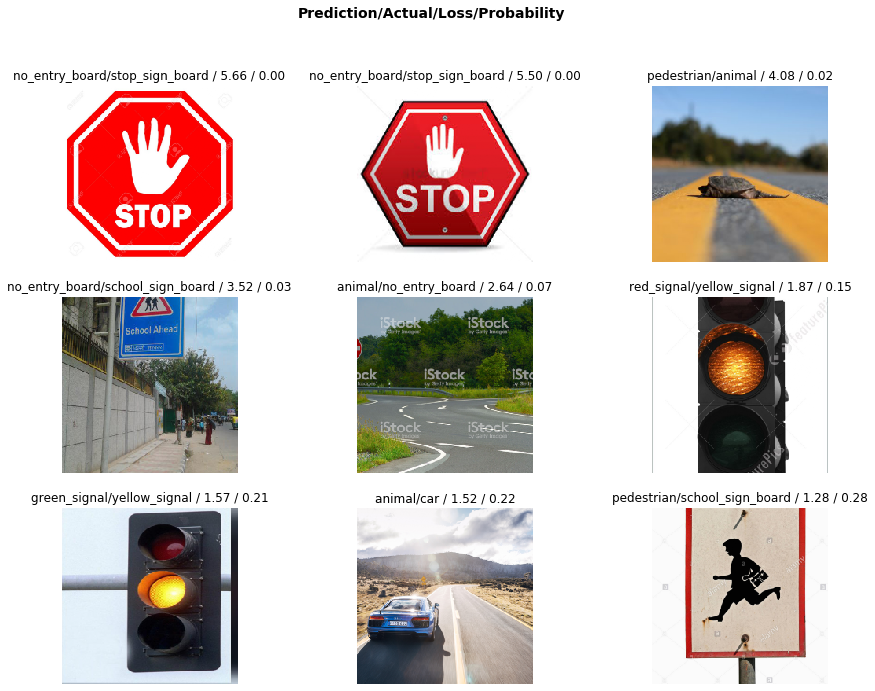

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


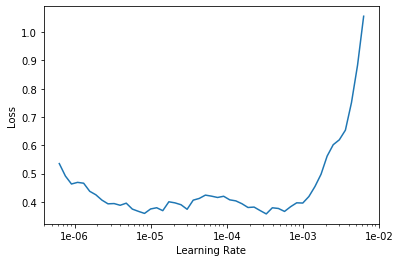

In [24]:
learn.recorder.plot()

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

That's a pretty accurate model!

In [26]:
learn.fit_one_cycle(15, max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.906252,2.859766,0.485714,00:48
1,1.172920,2.789857,0.285714,00:47
2,1.727490,4.833345,0.285714,00:46
3,3.423852,19.283726,0.485714,00:48
4,6.345598,28.416065,0.400000,00:47
5,9.472176,41.938850,0.571429,00:45
6,9.638680,9.134658,0.342857,00:52
7,9.313933,13.154779,0.371429,00:46
8,8.597323,13.606339,0.514286,00:46
9,7.449178,8.627489,0.342857,00:45


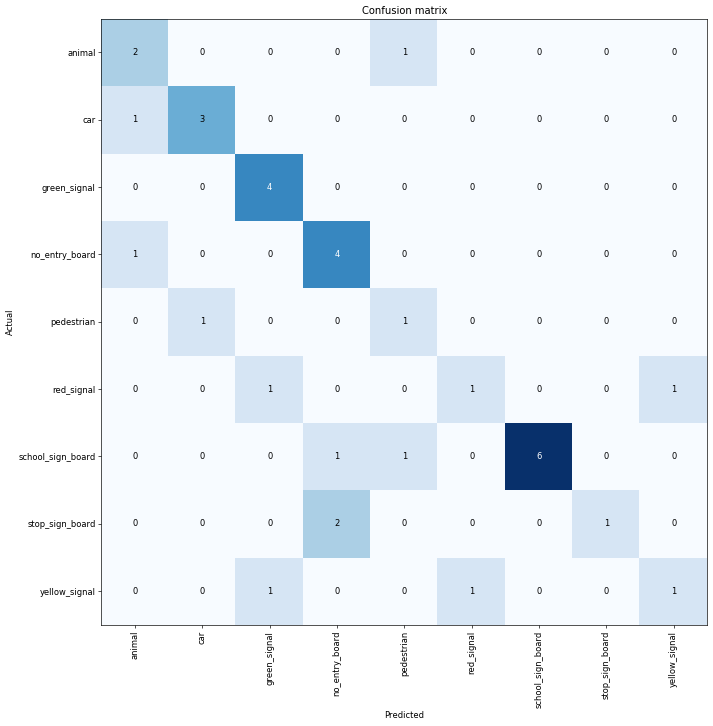

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

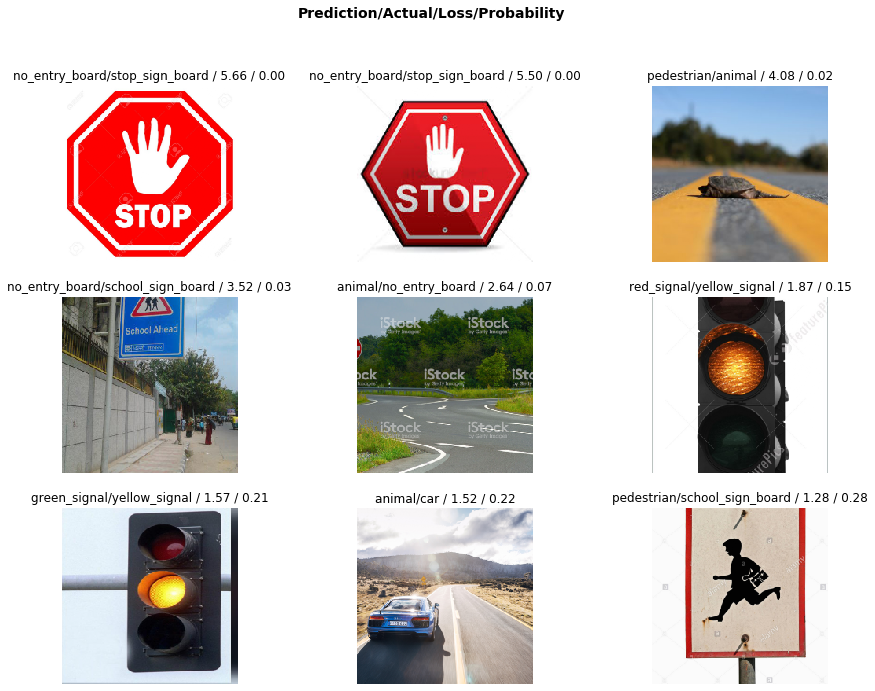

In [28]:
interp.plot_top_losses(9, figsize=(15,11))